In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [198]:
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [199]:
# IMPORT DATA

In [200]:

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [202]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [203]:
# EXPLORATORY DATA ANALYSIS

In [204]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

In [205]:
df_train["Cabin"] = df_train["Cabin"].str[0]
df_train["Has_cabin"] = df_train["Cabin"].notna()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [206]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Has_cabin      False
dtype: bool

<Figure size 1080x720 with 0 Axes>

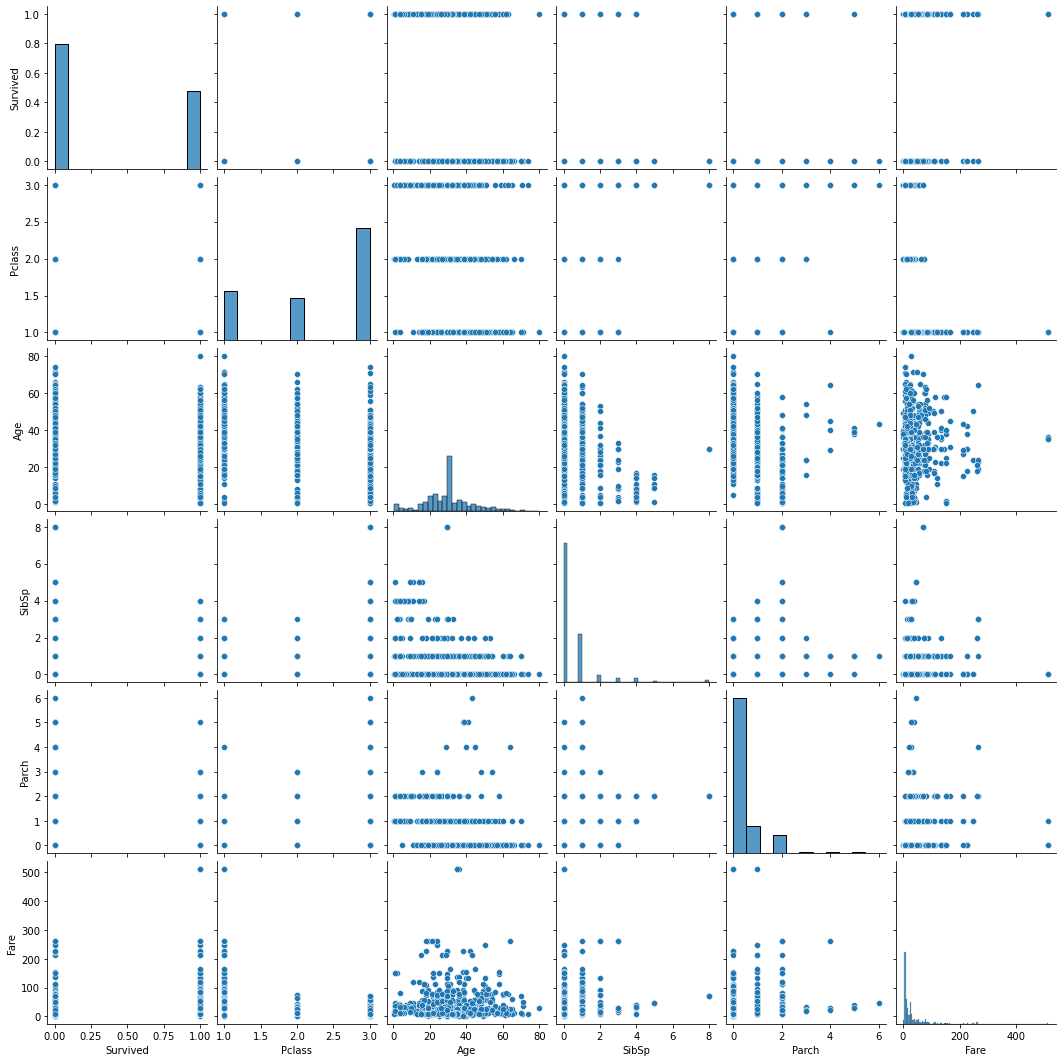

In [207]:
plt.figure(figsize = (15,10))
sns.pairplot(data = df_train[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]])
plt.show()

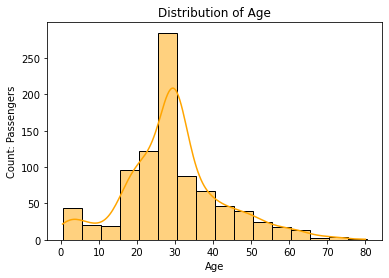

In [208]:
sns.histplot(x = 'Age', data = df_train, binwidth = 5, kde = True, color = 'orange')
plt.ylabel('Count: Passengers')
plt.title('Distribution of Age')
plt.show()

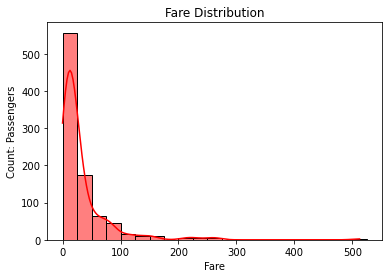

In [209]:
sns.histplot(x = 'Fare', data = df_train, binwidth = 25, kde = True, color = 'red')
plt.ylabel('Count: Passengers')
plt.title('Fare Distribution')
plt.show()

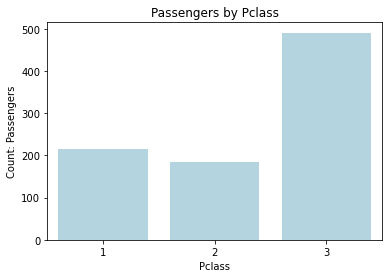

In [210]:
df_pclass_count = pd.DataFrame(df_train.loc[:,['Pclass']].value_counts()).reset_index()

sns.barplot(x = df_pclass_count.Pclass,y = df_pclass_count[0], color = 'lightblue')
plt.title('Passengers by Pclass')
plt.ylabel('Count: Passengers')
plt.show()

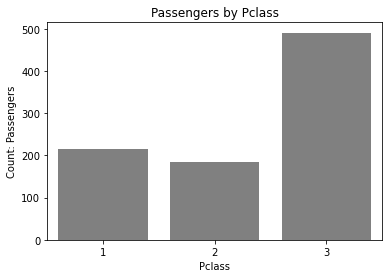

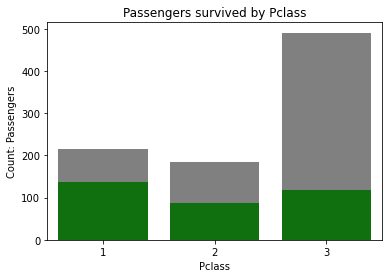

In [211]:
# Number of passengers by Pclass
df_pclass_count = pd.DataFrame(df_train.loc[:,['Pclass']].value_counts()).reset_index()
sns.barplot(x = df_pclass_count.Pclass,y = df_pclass_count[0], color = 'grey')
plt.title('Passengers by Pclass')
plt.ylabel('Count: Passengers')
plt.show()

# No of Passengers survived by Pclass
df_survived = pd.DataFrame(df_train.loc[(df_train.Survived == 1),['Pclass']].value_counts()).reset_index()
sns.barplot(x = df_pclass_count.Pclass,y = df_pclass_count[0], color = 'grey')
sns.barplot(x = df_survived.Pclass,y = df_survived[0], color = 'green')
plt.title('Passengers survived by Pclass')
plt.ylabel('Count: Passengers')
plt.show()

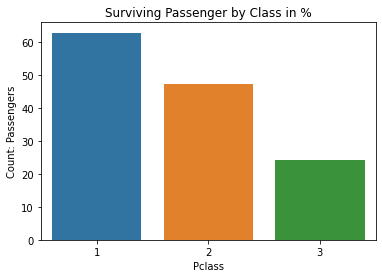

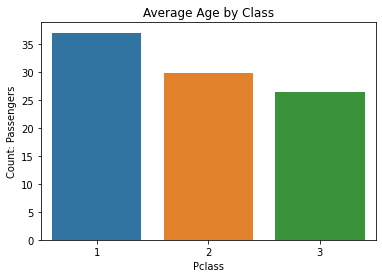

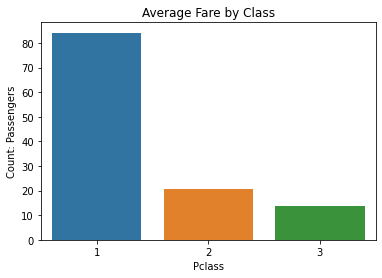

In [212]:
df_pclass = df_train.groupby(by = 'Pclass').mean().reset_index().loc[:,['Pclass','Survived','Age','Fare']]

bars = ['Survived','Age','Fare']
for i in bars:
    if i == 'Survived':
        sns.barplot(x = df_pclass.Pclass,y = df_pclass.Survived*100)
        plt.title('Surviving Passenger by Class in %')
    else:
        sns.barplot(x = df_pclass.Pclass,y = df_pclass[i])
        plt.title('Average '+i+ ' by Class')
    plt.ylabel('Count: Passengers')
    plt.show()

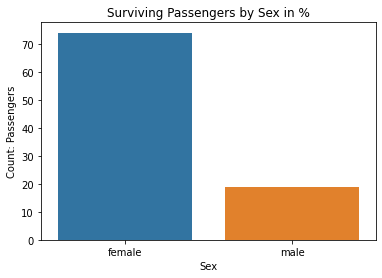

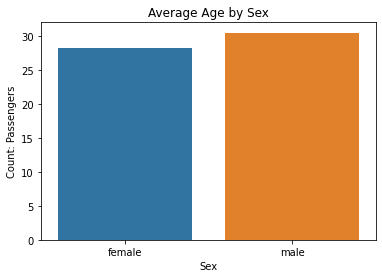

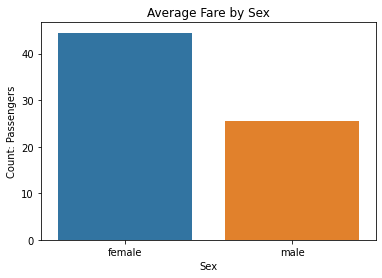

In [213]:
df_sex = df_train.groupby(by = 'Sex').mean().reset_index().loc[:,['Sex','Survived','Age','Fare']]

bars = ['Survived','Age','Fare']
for i in bars:
    if i == 'Survived':
        sns.barplot(x = df_sex.Sex,y = df_sex.Survived*100)
        plt.title('Surviving Passengers by Sex in %')
    else:
        sns.barplot(x = df_sex.Sex,y = df_sex[i])
        plt.title('Average '+i+ ' by Sex')
    plt.ylabel('Count: Passengers')
    plt.show()

In [214]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [215]:
df_train[df_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin


In [216]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Has_cabin    891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


In [217]:
imput1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imput1.fit(df_train.loc[:,['Age']])
df_train.loc[:,['Age']] = imput1.transform(df_train.loc[:,['Age']])

In [218]:
imput2 = SimpleImputer(missing_values=np.nan, strategy='mean')
imput2.fit(df_test.loc[:,['Age','Fare']])
df_test.loc[:,['Age','Fare']] = imput2.transform(df_test.loc[:,['Age','Fare']])

In [219]:
df_train = df_train.drop(df_train[df_train.Embarked.isna()].index.values

SyntaxError: unexpected EOF while parsing (<ipython-input-219-ba0a49180318>, line 1)

In [220]:
# train/test split

X_train = df_train.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train = df_train.loc[:,'Survived']

X_test = df_test.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [221]:
# label encoding: Encode target labels with value between 0 and n_classes-1

enc = LabelEncoder()

X_train.Sex = enc.fit_transform(X_train.Sex)
X_train.Embarked = enc.fit_transform(X_train.Embarked)

X_test.Sex = enc.fit_transform(X_test.Sex)
X_test.Embarked = enc.fit_transform(X_test.Embarked)

In [222]:
# Balancing the dataset 
 
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

NameError: name 'SMOTE' is not defined

In [223]:
# Scaling the data

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [224]:
# Grid Search for hyper parameter tuning
model_results = []
def classification_eval (algorithm, grid_params, X_train, X_test, y_train, model_name): 
    model = GridSearchCV(algorithm, grid_params, n_jobs = - 1, cv = 5, verbose = 1) 
    model. fit(X_train, y_train) 
    y_pred = model.predict (X_test) 
    print("Grid Search Best Score: \t", model.best_score_) 
    print("Grid Search Best Params: \t", model.best_params_)
    model_results.append([model_name,model.best_score_])
    return model, y_pred

In [226]:
# classification: logistic regression

m = LogisticRegression()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8013468013468014

In [229]:
# Classification using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
grid_params = {'max_depth' : [1,5,10], 'min_samples_leaf' : [1,5,10]} 

dt_model, y_pred_dt = classification_eval(DecisionTreeClassifier(), grid_params, X_train, X_test, y_train,'Decision Tree')
dt_model

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Grid Search Best Score: 	 0.8170547988199107
Grid Search Best Params: 	 {'max_depth': 5, 'min_samples_leaf': 10}


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10]},
             verbose=1)

In [238]:
m = DecisionTreeClassifier(max_depth=2)
m.fit(X_train, y_train)
ypred = m.predict(X_train)
ypred[0:5]

array([0, 1, 0, 1, 0])

In [239]:
m.score(X_train, y_train)

0.7957351290684624

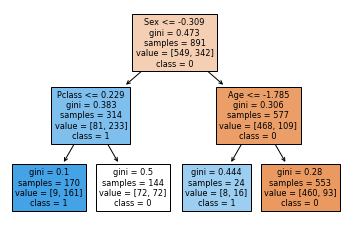

In [240]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
t = plot_tree(m, feature_names=["Pclass", "Sex", 'Age'],  class_names=["0", "1"], filled=True)

In [241]:
# Classification using Random Forest
from sklearn. ensemble import RandomForestClassifier 
grid_params = {'criterion':['gini'],'n_estimators' : [100, 250, 500], 'max_depth' : [1,5,10,15,20], 'min_samples_leaf' : [1,2,5]} 

rf_model, y_pred_rf = classification_eval(RandomForestClassifier(), grid_params, X_train, X_test, y_train,'Random Forest')
rf_model

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Grid Search Best Score: 	 0.8316678174628084
Grid Search Best Params: 	 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [2]:
results = pd.DataFrame(model_results,columns = ['Model','Best Score'])
results

NameError: name 'model_results' is not defined